In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pumkins = pd.read_csv("../data/US-pumpkins.csv")
pumkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [74]:
pumkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [75]:
pumkins['City Name'].unique()

array(['BALTIMORE', 'ATLANTA', 'BOSTON', 'CHICAGO', 'COLUMBIA',
       'LOS ANGELES', 'NEW YORK', 'DETROIT', 'DALLAS', 'MIAMI',
       'SAN FRANCISCO', 'PHILADELPHIA', 'ST. LOUIS'], dtype=object)

In [76]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumkins = pumkins.drop([c for c in pumkins.columns if c not in new_columns],axis=1)

In [77]:
price = (pumkins['Low Price'] + pumkins['High Price'])/2
month = pd.DatetimeIndex(pumkins['Date']).month

In [78]:
new_pumkins = pd.DataFrame(
    {'Month': month, 'Package': pumkins['Package'], "Low Price": pumkins['Low Price'], 'High Price': pumkins['High Price'], 'Price': price})


In [79]:
new_pumkins.head()

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


In [80]:
new_pumkins['Package'].unique()

array(['24 inch bins', '36 inch bins', '50 lb sacks',
       '1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bins', '35 lb cartons',
       'each', '20 lb cartons', '50 lb cartons', '40 lb cartons',
       'bushel baskets', '22 lb cartons'], dtype=object)

In [81]:
new_pumkins = new_pumkins[new_pumkins['Package'].str.contains('bushel', case=True, regex=True)]
print(new_pumkins.head())
print(new_pumkins['Package'].unique())

    Month               Package  Low Price  High Price  Price
70      9  1 1/9 bushel cartons       15.0        15.0   15.0
71      9  1 1/9 bushel cartons       18.0        18.0   18.0
72     10  1 1/9 bushel cartons       18.0        18.0   18.0
73     10  1 1/9 bushel cartons       17.0        17.0   17.0
74     10  1 1/9 bushel cartons       15.0        15.0   15.0
['1 1/9 bushel cartons' '1/2 bushel cartons' '1 1/9 bushel crates'
 'bushel cartons' 'bushel baskets']


In [82]:
new_pumkins.loc[new_pumkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1+1/9)
new_pumkins.loc[new_pumkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [83]:
new_pumkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


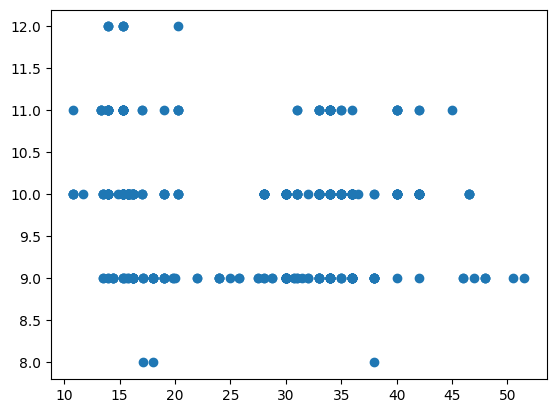

In [84]:
price = new_pumkins.Price
month = new_pumkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumkin Price')

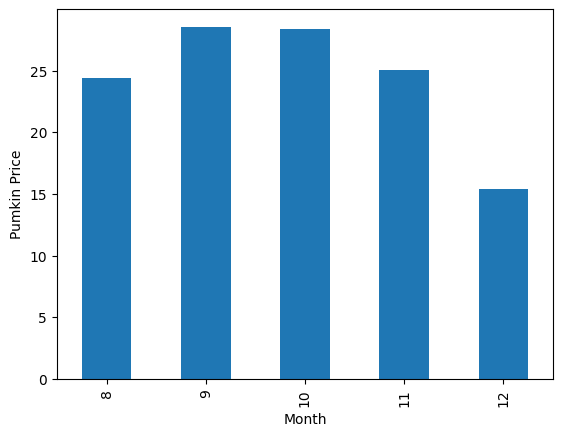

In [89]:
new_pumkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumkin Price")

<AxesSubplot: xlabel='Month'>

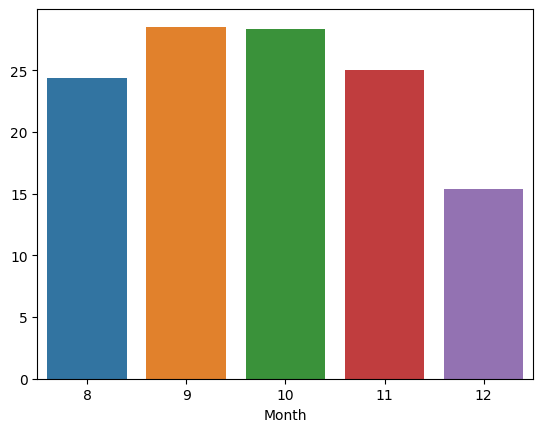

In [110]:
group = new_pumkins.groupby(['Month'])['Price'].mean()
sns.barplot(x=group.index, y=group.values)

<AxesSubplot: xlabel='Month'>

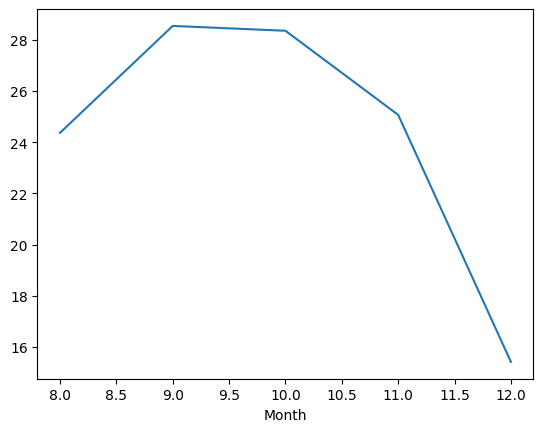

In [113]:
sns.lineplot(x=group.index, y=group.values)